In [1]:
import sys
sys.path.append("..")
from PHaem import PHaem
from MonteCarlo import MonteCarlo

import numpy as np
import matplotlib.pyplot as plt

In [24]:
ex = PHaem(dh=25, ny=3, dip=110, H=80, rho_fault=20, rho_back=30)
ex.setup_simulation()

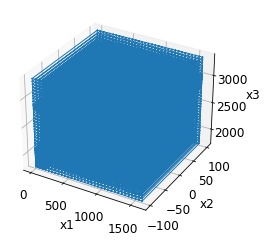

OcTreeMesh: 32.75% filled

Level : Number of cells               Mesh Extent               Cell Widths    
-----------------------           min     ,     max            min   ,   max   
  1   :       787            ---------------------------   --------------------
  2   :      1896         x:      0.0     ,   1600.0          25.0   ,    50.0   
-----------------------   y:    -100.0    ,    100.0         100.0   ,   200.0   
Total :      2683         z:    1755.67   ,   3355.67         25.0   ,    50.0

In [25]:
ex.mesh.plotGrid(show_it=True)
ex.mesh

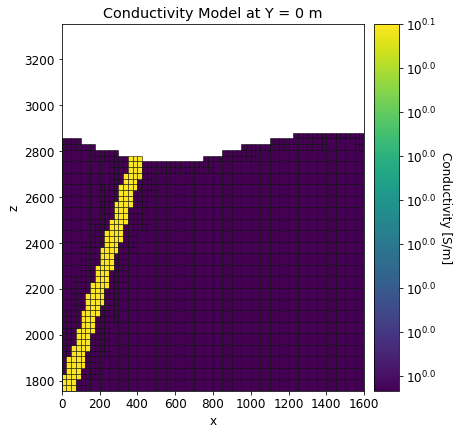

In [26]:
ex.plot_slice()

In [27]:
ex.simulate();

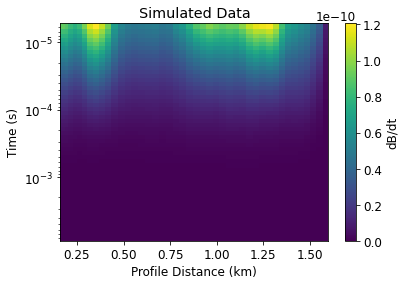

In [28]:
ex.plot_data()

# Monte Carlo

In [16]:
MCfolder = 'data/tmp/'
N=50

dip = [25, 165] #uniform
H = [120, 40] #normal
xpos = [400,40] #normal
rho_fault = [10, 10, .45] #lognormal
rho_back = [20, 30, .6] #lognormal

dep = 1000 #Minimum depth within domain (m)
xtra = 1000 #Buffer on each end of electrodes
dh = 25
y0 = 100
ny = 3

seed = 0
overwrite = True
parallel = False
nproc = None
showDists = True
saveParams=True

In [17]:
MC = MonteCarlo(dep,
                xtra, 
                dh,
                y0,
                ny,
                dip, 
                H, 
                xpos,
                rho_fault, 
                rho_back, 
                N, 
                MCfolder, 
                overwrite=overwrite, 
                parallel=parallel, 
                nproc=nproc, 
                seed=seed,
                showDists=showDists, 
                saveParams=saveParams)

MC folder already exists. Overwriting.


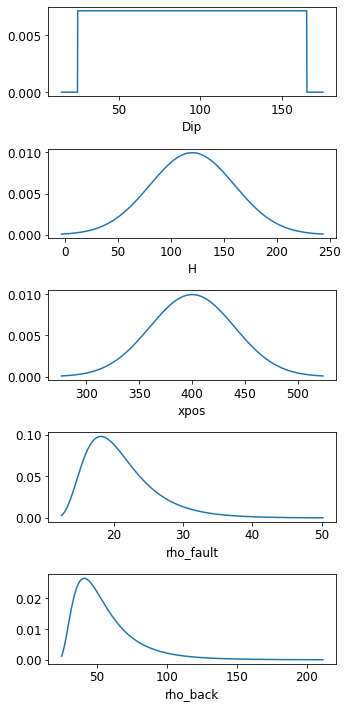

In [18]:
MC.plot_dists(figsize=(5,10))

Fracture dip angle: 37.2
Fracture thickness (m): 132.1
Fracture outcrop x-position (m): 370.1
Fracture zone resistivity (Ohm-m): 26.15
Background resistivity (Ohm-m): 56.62


OcTreeMesh: 39.33% filled

Level : Number of cells               Mesh Extent               Cell Widths    
-----------------------           min     ,     max            min   ,   max   
  1   :       710            ---------------------------   --------------------
  2   :      2512         x:      0.0     ,   1600.0          25.0   ,    50.0   
-----------------------   y:    -100.0    ,    100.0         100.0   ,   200.0   
Total :      3222         z:    1755.67   ,   3355.67         25.0   ,    50.0

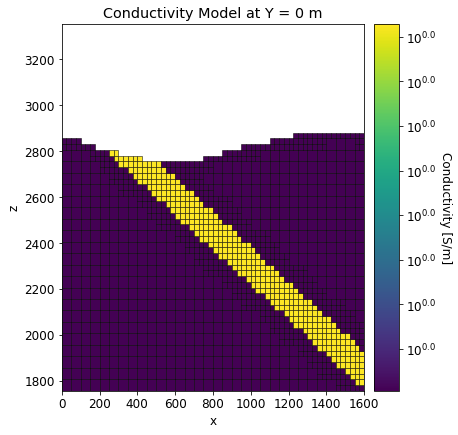

In [10]:
r = 15
print("Fracture dip angle: "+str(np.round(MC.PARAMS[r][1],2)))
print("Fracture thickness (m): "+str(np.round(MC.PARAMS[r][2],2)))
print("Fracture outcrop x-position (m): "+str(np.round(MC.PARAMS[r][3],2)))
print("Fracture zone resistivity (Ohm-m): "+str(np.round(MC.PARAMS[r][4],2)))
print("Background resistivity (Ohm-m): "+str(np.round(MC.PARAMS[r][5],2)))

setup = MC.prepare_realization(r)
setup.plot_slice()
setup.mesh

In [11]:
data = MC.realize(r)

Simulating realization 15


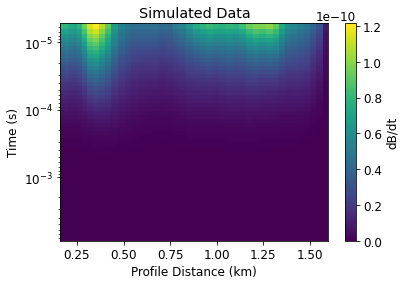

In [12]:
data.plot_data()

# Actual Realizations

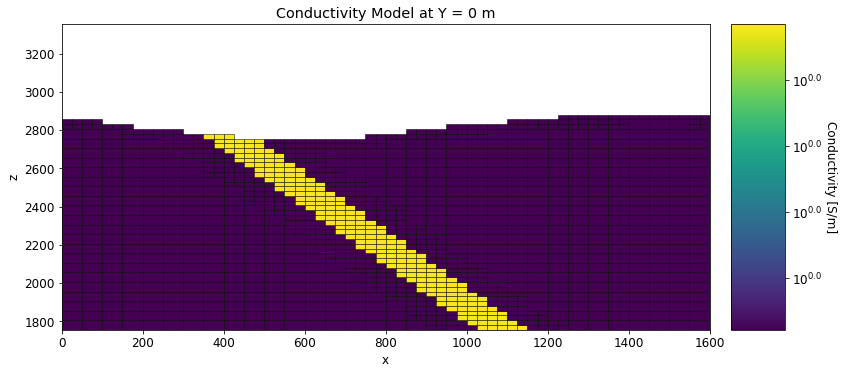

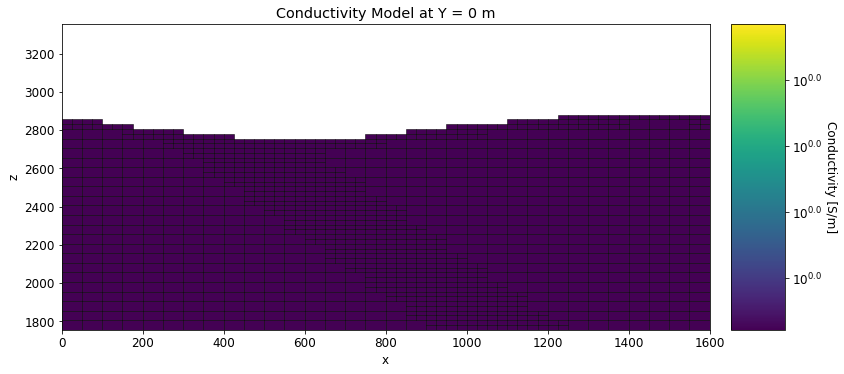

In [13]:
#array([ 56.23142857, 106.23214174, 410.88442573,  29.21793554, 90.06537979])
fs = (15,5)
ex = PHaem(dh=25, ny=3, dip=56.23142857, H=106.23214174, xpos=410.88442573, rho_fault=29.21793554, rho_back=90.06537979)
ex.setup_simulation()
# ex.plot_slice(figsize=fs, vmin=np.log10(1/90.), vmax=np.log10(1/29.))
# ex.plot_slice(figsize=fs)
ex.plot_slice(figsize=fs, vmin=1/90., vmax=1/29.)
# ex.plot_slice(figsize=fs, vmin=29., vmax=90.)


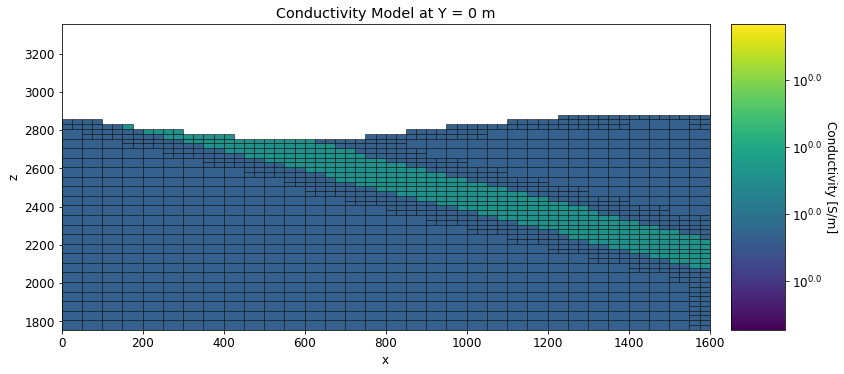

In [14]:
#array([ 27.59305122, 145.06257003, 409.55011482,  43.79640881,   54.73053317])
fs = (15,5)
ex = PHaem(dh=25, ny=3, dip=27.59305122, H=145.06257003, xpos=409.55011482, rho_fault=43.79640881, rho_back=54.73053317)
ex.setup_simulation()
# ex.plot_slice(figsize=fs, vmin=np.log10(1/90.), vmax=np.log10(1/29.))
ex.plot_slice(figsize=fs, vmin=1/90., vmax=1/29.)


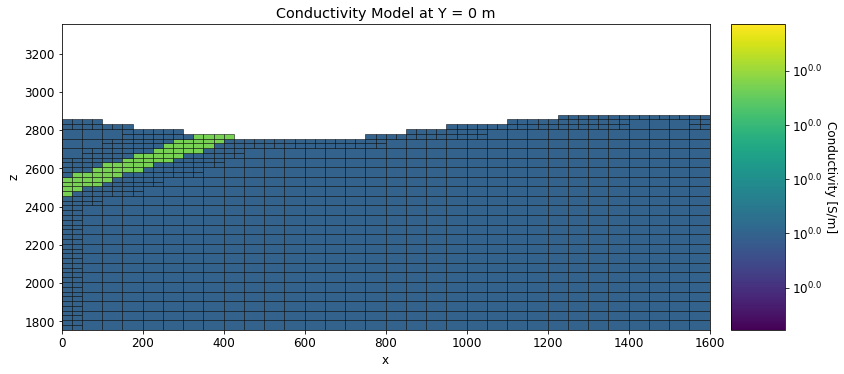

In [15]:
#array([145.16726941,  72.60450222, 392.88290616,  33.64400584,54.22660804])
fs = (15,5)
ex = PHaem(dh=25, ny=3, dip=145.16726941, H=72.60450222, xpos=392.88290616, rho_fault=33.64400584, rho_back=54.22660804)
ex.setup_simulation()
# ex.plot_slice(figsize=fs, vmin=np.log10(1/90.), vmax=np.log10(1/29.))
ex.plot_slice(figsize=fs, vmin=1/90., vmax=1/29.)
